In [1]:
!which python3

/Users/surya/Library/Caches/pypoetry/virtualenvs/powr-NZLclV9x-py3.10/bin/python3


In [2]:
import os
from pathlib import Path
# Path.cwd().absolute()
root_dir = '/Users/surya/Development/surya/powr/'
os.chdir(root_dir)
Path.cwd().absolute()

PosixPath('/Users/surya/Development/surya/powr')

In [3]:
import pandas as pd 
df = pd.read_csv('data/clean/data.csv', header=0, parse_dates=['CREATED_AT'], index_col='CREATED_AT')
df

,VALUE,day_sin,day_cos,hour_sin,hour_cos,month_sin,month_cos,MA30,MA15
CREATED_AT,,,,,,,,,
2022-03-01 00:00:00+00:00,1889.741211,-2.421079e-12,1.000000,-5.810590e-11,1.000000e+00,0.741222,-0.671260,0.000000,0.000000
2022-03-01 00:05:00+00:00,1886.260742,2.181489e-02,0.999762,5.000000e-01,8.660254e-01,0.740740,-0.671791,0.000000,0.000000
2022-03-01 00:10:00+00:00,1888.308594,4.361939e-02,0.999048,8.660254e-01,5.000000e-01,0.740258,-0.672323,0.000000,0.000000
2022-03-01 00:15:00+00:00,1873.037109,6.540313e-02,0.997859,1.000000e+00,1.188769e-10,0.739776,-0.672853,0.000000,0.000000
2022-03-01 00:20:00+00:00,1863.653320,8.715574e-02,0.996195,8.660254e-01,-5.000000e-01,0.739293,-0.673384,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2022-10-24 23:35:00+00:00,118.231399,-1.088669e-01,0.994056,-5.000000e-01,-8.660254e-01,0.932548,0.361045,118.822349,123.420337
2022-10-24 23:40:00+00:00,194.981689,-8.715574e-02,0.996195,-8.660254e-01,-5.000000e-01,0.932807,0.360376,122.386000,128.203858
2022-10-24 23:45:00+00:00,191.545715,-6.540313e-02,0.997859,-1.000000e+00,1.087001e-10,0.933065,0.359707,126.001261,135.134249


### Extracting date time features
- hour
- day
- month
as sin & cosine signals
extracting monthly features too even though fft revealed that the data is not seasonal month (probably because we only have a few months of data)

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
df.index.astype(np.int64) // 10 ** 9


Int64Index([1646092800, 1646093100, 1646093400, 1646093700, 1646094000,
            1646094300, 1646094600, 1646094900, 1646095200, 1646095500,
            ...
            1666653000, 1666653300, 1666653600, 1666653900, 1666654200,
            1666654500, 1666654800, 1666655100, 1666655400, 1666655700],
           dtype='int64', name='CREATED_AT', length=68544)

In [6]:
df.index[0].timestamp()

1646092800.0

In [7]:
def make_features(cleaned_df):
    df = cleaned_df.copy(deep=True)
    ts = df.index.astype(np.int64) // 10 ** 9
    df['day_sin'] = np.sin(ts * (2 * np.pi / 86400))
    df['day_cos'] = np.cos(ts * (2 * np.pi / 86400))
    df['hour_sin'] = np.sin(ts * (2 * np.pi / 3600))
    df['hour_cos'] = np.cos(ts * (2 * np.pi / 3600))
    df['month_sin'] = np.sin(ts * (2 * np.pi / 2.628e+6))
    df['month_cos'] = np.cos(ts * (2 * np.pi / 2.628e+6))
    df['MA30'] = df['VALUE'].rolling(window=30).mean()
    df['MA15'] = df['VALUE'].rolling(window=15).mean()
    df[['MA15', 'MA30']] = df[['MA15', 'MA30']].fillna(0, inplace=False)
    df.reset_index(inplace=True, drop=False)
    return df
df_feat = make_features(df)
df_feat

,CREATED_AT,VALUE,day_sin,day_cos,hour_sin,hour_cos,month_sin,month_cos,MA30,MA15
0,2022-03-01 00:00:00+00:00,1889.741211,-2.421079e-12,1.000000,-5.810590e-11,1.000000e+00,0.741222,-0.671260,0.000000,0.000000
1,2022-03-01 00:05:00+00:00,1886.260742,2.181489e-02,0.999762,5.000000e-01,8.660254e-01,0.740740,-0.671791,0.000000,0.000000
2,2022-03-01 00:10:00+00:00,1888.308594,4.361939e-02,0.999048,8.660254e-01,5.000000e-01,0.740258,-0.672323,0.000000,0.000000
3,2022-03-01 00:15:00+00:00,1873.037109,6.540313e-02,0.997859,1.000000e+00,1.188769e-10,0.739776,-0.672853,0.000000,0.000000
4,2022-03-01 00:20:00+00:00,1863.653320,8.715574e-02,0.996195,8.660254e-01,-5.000000e-01,0.739293,-0.673384,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
68539,2022-10-24 23:35:00+00:00,118.231399,-1.088669e-01,0.994056,-5.000000e-01,-8.660254e-01,0.932548,0.361045,118.822349,123.420337
68540,2022-10-24 23:40:00+00:00,194.981689,-8.715574e-02,0.996195,-8.660254e-01,-5.000000e-01,0.932807,0.360376,122.386000,128.203858
68541,2022-10-24 23:45:00+00:00,191.545715,-6.540313e-02,0.997859,-1.000000e+00,1.087001e-10,0.933065,0.359707,126.001261,135.134249
68542,2022-10-24 23:50:00+00:00,208.008789,-4.361939e-02,0.999048,-8.660254e-01,5.000000e-01,0.933323,0.359037,129.754248,145.432410


Text(0.5, 1.0, 'Time of day signal')

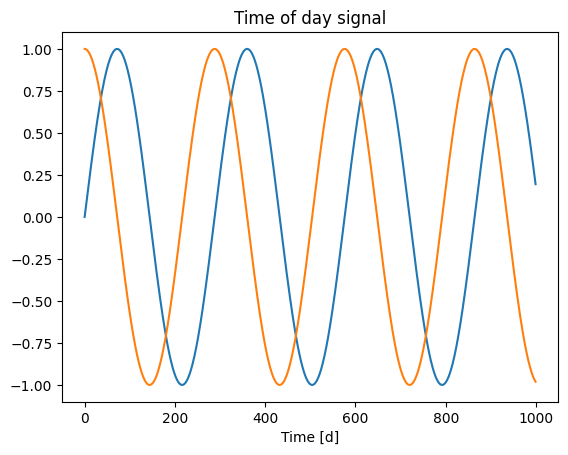

In [8]:
plt.plot(np.array(df_feat['day_sin'])[:1000])
plt.plot(np.array(df_feat['day_cos'])[:1000])
plt.xlabel('Time [d]')
plt.title('Time of day signal')

In [9]:
df_feat.isna().sum()

CREATED_AT    0
VALUE         0
day_sin       0
day_cos       0
hour_sin      0
hour_cos      0
month_sin     0
month_cos     0
MA30          0
MA15          0
dtype: int64

In [10]:
df_feat.columns

Index(['CREATED_AT', 'VALUE', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos',
       'month_sin', 'month_cos', 'MA30', 'MA15'],
      dtype='object')

In [11]:
df_feat

,CREATED_AT,VALUE,day_sin,day_cos,hour_sin,hour_cos,month_sin,month_cos,MA30,MA15
0,2022-03-01 00:00:00+00:00,1889.741211,-2.421079e-12,1.000000,-5.810590e-11,1.000000e+00,0.741222,-0.671260,0.000000,0.000000
1,2022-03-01 00:05:00+00:00,1886.260742,2.181489e-02,0.999762,5.000000e-01,8.660254e-01,0.740740,-0.671791,0.000000,0.000000
2,2022-03-01 00:10:00+00:00,1888.308594,4.361939e-02,0.999048,8.660254e-01,5.000000e-01,0.740258,-0.672323,0.000000,0.000000
3,2022-03-01 00:15:00+00:00,1873.037109,6.540313e-02,0.997859,1.000000e+00,1.188769e-10,0.739776,-0.672853,0.000000,0.000000
4,2022-03-01 00:20:00+00:00,1863.653320,8.715574e-02,0.996195,8.660254e-01,-5.000000e-01,0.739293,-0.673384,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
68539,2022-10-24 23:35:00+00:00,118.231399,-1.088669e-01,0.994056,-5.000000e-01,-8.660254e-01,0.932548,0.361045,118.822349,123.420337
68540,2022-10-24 23:40:00+00:00,194.981689,-8.715574e-02,0.996195,-8.660254e-01,-5.000000e-01,0.932807,0.360376,122.386000,128.203858
68541,2022-10-24 23:45:00+00:00,191.545715,-6.540313e-02,0.997859,-1.000000e+00,1.087001e-10,0.933065,0.359707,126.001261,135.134249
68542,2022-10-24 23:50:00+00:00,208.008789,-4.361939e-02,0.999048,-8.660254e-01,5.000000e-01,0.933323,0.359037,129.754248,145.432410


### Feature Importance
- train a random forest regressor (that predicts VALUE given other features) to get feature importance

In [12]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler


In [13]:
FEATURES = ['day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos'] #, 'MA30', 'MA15']
TARGET = 'VALUE'
print(FEATURES, TARGET)
print(len(FEATURES))

['day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos'] VALUE
6


In [14]:
# taking only the last split
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(df_feat):
    train_idx, test_idx = train_index, test_index
print(train_idx, test_idx)
X_train, X_test = df_feat[FEATURES].iloc[train_idx], df_feat[FEATURES].iloc[test_idx]
y_train, y_test = df_feat[TARGET].iloc[train_idx], df_feat[TARGET].iloc[test_idx]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

[    0     1     2 ... 57117 57118 57119] [57120 57121 57122 ... 68541 68542 68543]
(57120, 6) (11424, 6) (57120,) (11424,)


**Normalising VALUES**
- only scaling using the training data in order to avoid data leakage

In [15]:
scaler = MinMaxScaler(feature_range=(-1, 1))
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))
print(y_train.shape, y_test.shape)

(57120, 1) (11424, 1)


In [16]:
xreg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
xreg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [17]:
xreg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:0.98878	validation_1-rmse:0.99232
[100]	validation_0-rmse:0.09378	validation_1-rmse:0.22592
[200]	validation_0-rmse:0.07506	validation_1-rmse:0.23018
[300]	validation_0-rmse:0.06468	validation_1-rmse:0.23231
[400]	validation_0-rmse:0.05831	validation_1-rmse:0.23375
[500]	validation_0-rmse:0.05229	validation_1-rmse:0.23509
[600]	validation_0-rmse:0.04801	validation_1-rmse:0.23593
[700]	validation_0-rmse:0.04421	validation_1-rmse:0.23637
[800]	validation_0-rmse:0.04111	validation_1-rmse:0.23689
[900]	validation_0-rmse:0.03834	validation_1-rmse:0.23716
[999]	validation_0-rmse:0.03617	validation_1-rmse:0.23726


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

<AxesSubplot: title={'center': 'Feature Importance'}>

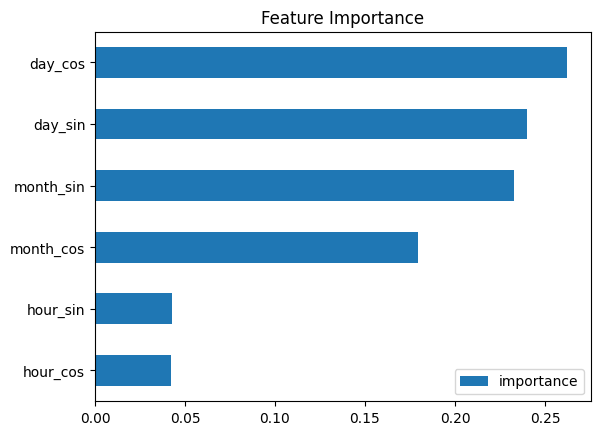

In [18]:
fi = pd.DataFrame(data=xreg.feature_importances_,
             index=xreg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')

['day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'MA30', 'MA15'] VALUE
8
[    0     1     2 ... 57117 57118 57119] [57120 57121 57122 ... 68541 68542 68543]
(57120, 8) (11424, 8) (57120,) (11424,)
(57120, 1) (11424, 1)
[0]	validation_0-rmse:0.98536	validation_1-rmse:0.98856
[100]	validation_0-rmse:0.07368	validation_1-rmse:0.14989
[200]	validation_0-rmse:0.06012	validation_1-rmse:0.15140
[300]	validation_0-rmse:0.05190	validation_1-rmse:0.15333
[400]	validation_0-rmse:0.04537	validation_1-rmse:0.15456
[500]	validation_0-rmse:0.04008	validation_1-rmse:0.15552
[600]	validation_0-rmse:0.03582	validation_1-rmse:0.15565
[700]	validation_0-rmse:0.03240	validation_1-rmse:0.15601
[800]	validation_0-rmse:0.02969	validation_1-rmse:0.15645
[900]	validation_0-rmse:0.02698	validation_1-rmse:0.15680
[999]	validation_0-rmse:0.02485	validation_1-rmse:0.15697


<AxesSubplot: title={'center': 'Feature Importance'}>

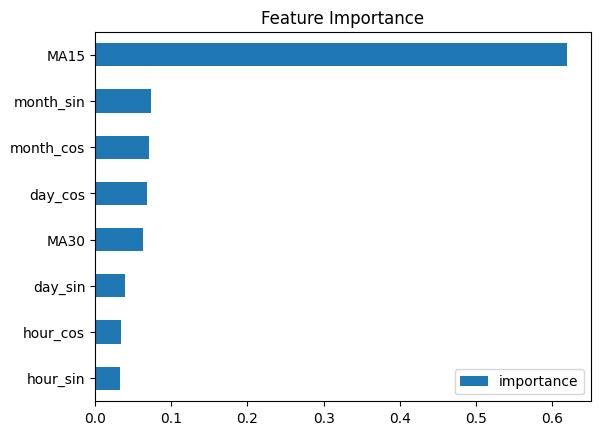

In [20]:
FEATURES = ['day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos', 'MA30', 'MA15']
TARGET = 'VALUE'
print(FEATURES, TARGET)
print(len(FEATURES))

# taking only the last split
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(df_feat):
    train_idx, test_idx = train_index, test_index
print(train_idx, test_idx)
X_train, X_test = df_feat[FEATURES].iloc[train_idx], df_feat[FEATURES].iloc[test_idx]
y_train, y_test = df_feat[TARGET].iloc[train_idx], df_feat[TARGET].iloc[test_idx]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

scaler = MinMaxScaler(feature_range=(-1, 1))
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))
print(y_train.shape, y_test.shape)

xreg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)

xreg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

fi = pd.DataFrame(data=xreg.feature_importances_,
             index=xreg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')

### Feature Selection
- as a very naive approach, we can see that all these features are adding some value. More comprehensive analysis to be done later in picking the right features
- even though moving averages seem to be contributing most to this model they might not be availble during prediction time. So ommitting them as a cautionary measure

In [21]:
df_feat[['day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos',] + [TARGET]]

,day_sin,day_cos,hour_sin,hour_cos,month_sin,month_cos,VALUE
0,-2.421079e-12,1.000000,-5.810590e-11,1.000000e+00,0.741222,-0.671260,1889.741211
1,2.181489e-02,0.999762,5.000000e-01,8.660254e-01,0.740740,-0.671791,1886.260742
2,4.361939e-02,0.999048,8.660254e-01,5.000000e-01,0.740258,-0.672323,1888.308594
3,6.540313e-02,0.997859,1.000000e+00,1.188769e-10,0.739776,-0.672853,1873.037109
4,8.715574e-02,0.996195,8.660254e-01,-5.000000e-01,0.739293,-0.673384,1863.653320
...,...,...,...,...,...,...,...
68539,-1.088669e-01,0.994056,-5.000000e-01,-8.660254e-01,0.932548,0.361045,118.231399
68540,-8.715574e-02,0.996195,-8.660254e-01,-5.000000e-01,0.932807,0.360376,194.981689
68541,-6.540313e-02,0.997859,-1.000000e+00,1.087001e-10,0.933065,0.359707,191.545715
68542,-4.361939e-02,0.999048,-8.660254e-01,5.000000e-01,0.933323,0.359037,208.008789
